<a href="https://colab.research.google.com/github/rpizarrog/Analisis-Inteligente-de-datos/blob/main/bloc%20de%20notas/Caso_7_Regresi%C3%B3n_Polin%C3%B3mica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASO 7. Regresión Polnómica
Rubén Pizarro Gurrola
04-Oct-2021

# Objetivo

Desarrollar predicciones y evaluación de modelos de regresión polinómica coparado con modelos de regresión simple.

# Descripción

Se elabora un modelo de regresión lineal simple y se comparar con un modelo de regresión polinómica conforme y de acuerdo al valor R square o Coeficiente de Determinación. 

Los datos se obtienen https://www.kaggle.com/akram24/position-salaries

La fuente original del ejemplo se encuentra en https://www.ellaberintodefalken.com/2019/12/regresion-polinomica-polinomial.html




# Marco teórico

Los modelos lineales tienen la ventaja de ser fácilmente interpretables, sin embargo, pueden tener limitaciones importantes en capacidad predictiva. Esto se debe a que, la asunción de linealidad, es con frecuencia una aproximación demasiado simple para describir las relaciones reales entre variables. A continuación, se describen métodos que permiten relajar la condición de linealidad intentando mantener al mismo tiempo una interpretabilidad alta.

La forma más sencilla de incorporar flexibilidad a un modelo lineal es introduciendo nuevos predictores obtenidos al elevar a distintas potencias el predictor original.

Partiendo del modelo lineal: 
$$ y = β0 + β1xi + ϵi$$

Ahora se rpetende una ecuacuón polinomial
$$
y = β0 + β1{x_i} +β2{x_i}^2+β3{x_i}^3...+βn{x_i}^n+ϵi
$$





# Desarrollo 
## Cargar los datos



In [224]:
import pandas as pd
 
datos = pd.read_csv('https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/Position_Salaries.csv')
print (datos)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


## Crear el modelo de regresión lineal



In [225]:

from matplotlib import pyplot as plt
 
# Conertirlo a arreglos independiente 
x = datos['Level'].values.reshape(-1, 1) # Variable independiente
y = datos['Salary'].values.reshape(-1, 1) # Variable dependiente

print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [226]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### Visualizar datos
Se construye la gráfica de dispersión con los datos


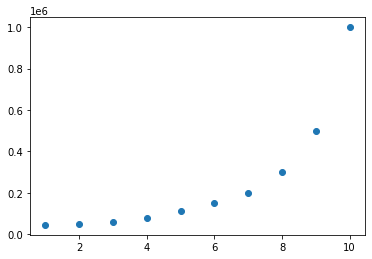

In [227]:
plt.scatter(x,y)

### Crear modelo de regresión lineal simple


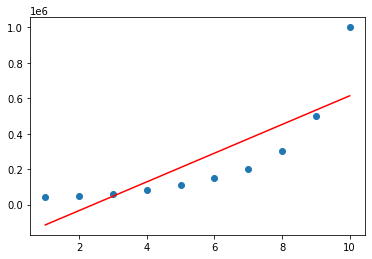

In [228]:
from sklearn.linear_model import LinearRegression
 
modelo_lin = LinearRegression()
modelo_lin.fit(x, y)
y_pred = modelo_lin.predict(x)
 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

Se observa que una linea recta no es el mejor ajuste para el modelo, es decir, se puedier aencontrar un mejor modelo para estos datos en donde la eficiencia del mismo fuera mejor.

Se evalúa el modleo con base en el valor e R Sqare o coeficiente de determinación.


### Evaluación del modelo con R Square

In [229]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

RMSE: 163388.73519272613
R2: 0.6690412331929895


### Coeficientes en el modelo de regresión lineal simple


In [230]:
b0 = modelo_lin.intercept_
print (b0)

[-195333.33333333]


In [231]:
b1 = modelo_lin.coef_
print(b1)

[[80878.78787879]]


$$ y = b0 + b1x_i$$
$$ y.prediccion = -195333.3333333 + 80878.78787879 \times level$$



###  Predecir un valor de 5 confome a fórmula


In [232]:

prediccion = -195333.333333 + 80878.78787879 * 5

print(prediccion)

209060.60606095


### Predecir un valor de 5 conforme a la función predict()

In [233]:
pred = modelo_lin.predict([[5]])
print(pred)

[[209060.60606061]]


## Modelo de regresión polinómica al cuadrado



De acuerdo al modelo de regresión lineal simple la variable independiente *Level* representa ek 66.90% la variable dependiente *Salary*

In [234]:
from sklearn.preprocessing import PolynomialFeatures
 
polyn = PolynomialFeatures(degree=2)

x_poly = polyn.fit_transform(x)
print(x)
print(x_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


### Modelo polinómico ajustado al cuadrado



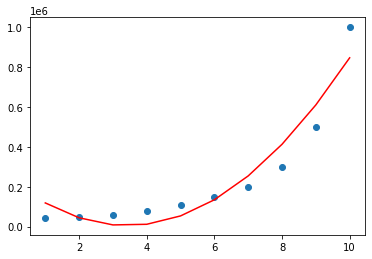

RMSE: 82212.12400451249
R2: 0.9162082221443942


In [235]:
modelo_pol2 = LinearRegression()
modelo_pol2.fit(x_poly, y)

y_pred = modelo_pol2.predict(x_poly)


 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

El valor de R Square o coeficiente de determinación con un modelo de regresión polinómico a la segunda potencia es de 91.62% que significa que tanto representa la variable independiente **level** a la variable ependiente **salary** en el conjunto de datos.



### Coeficientes en el modelo de regresión polinómica al cuadrado





In [236]:
b0 = modelo_pol2.intercept_
print(b0)

[232166.66666667]


In [237]:
b1 = modelo_pol2.coef_
print(b1)

[[      0.         -132871.21212121   19431.81818182]]


$$
y = β0 + β1{x_i} +β2{x_i}^2+β3{x_i}^3...+βn{x_i}^n+ϵi
$$



### Predecir conforme a la fórmula

Valor de level igual a 5 

In [238]:
prediccion = 232166.66666667 + (-132871.21212121 * 5) + (19431.81818182 * pow(5, 2))
print(prediccion)

53606.06060611992


In [239]:
pred = modelo_pol2.predict(polyn.fit_transform([[5]]))
print(pred)

[[53606.06060606]]





# Interpretación 

¿Cuál de los dos modelos tiene mejor ajuste?. Resp. El modelo polinómico para este conjunto de datos.

¿Podrá haber otro modelo con mejor ajuste para este conjunto d edatos?. Probar con un modelo polinómico a la tercera potencia.

## Modelo polinómico ajustado al cubo

In [240]:
polyn3 = PolynomialFeatures(degree=3)

x_poly3 = polyn3.fit_transform(x)
print(x)
print(x_poly3)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


### Modelo polinómico al cubo

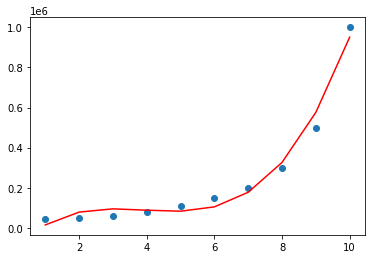

RMSE: 38931.50401232919
R2: 0.9812097727913367


In [241]:
modelo_pol3 = LinearRegression()
modelo_pol3.fit(x_poly3, y)

y_pred = modelo_pol3.predict(x_poly3)


 
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()
 
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

Parece que la ecuación a la tercera potencia se obtiene un valor de R Sware muy alto, el 98% de representatividad de la variable **Level** a la variable **Salary**.



### Coeficientes en el modelo de regresión polinómica al cubo

In [242]:
b0 = modelo_pol3.intercept_
print(b0)

[-121333.33333331]


In [243]:
b1 = modelo_pol3.coef_
print(b1)

[[     0.         180664.33566432 -48548.95104895   4120.04662005]]


### Predecir 

#### Predecir conforme a fórmula

Valor de Lebel = 5



In [244]:
prediccion = -121333.33333331 + (180664.33566432 * 5) + (-48548.95104895 * pow(5, 2) + (4120.04662005 * pow(5,3)))
print(prediccion)

83270.39627079002


#### Predecir conforme a función predict()


In [245]:
pred = modelo_pol3.predict(polyn3.fit_transform([[5]]))
print(pred)

[[83270.39627039]]
